In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import mannwhitneyu, wilcoxon

In [5]:
logger_name = '../main/log' + "/GSGP_CGXO_20250115.csv"

data = pd.read_csv(logger_name, names=["algo", "experiment", "experiment_id", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness", "elite_size", "log_level"])

In [6]:
data.head()

algo experiment                         experiment_id dataset  seed  \
0  GSGP   only_gxo  e4c504fa-d34b-11ef-a3d8-72c976fed59c   yatch     0   
1  GSGP   only_gxo  e4c504fa-d34b-11ef-a3d8-72c976fed59c   yatch     0   
2  GSGP   only_gxo  e4c504fa-d34b-11ef-a3d8-72c976fed59c   yatch     0   
3  GSGP   only_gxo  e4c504fa-d34b-11ef-a3d8-72c976fed59c   yatch     0   
4  GSGP   only_gxo  e4c504fa-d34b-11ef-a3d8-72c976fed59c   yatch     0   

   generation  training_fitness    timing  pop_node_count  test_fitness  \
0           0         15.607614  0.166961          3760.0     14.737427   
1           1         15.574152  0.047202          5232.0     14.638897   
2           2         15.344718  0.041679         11860.0     14.209839   
3           3         15.344718  0.040442         24364.0     14.209839   
4           4         15.342106  0.041881         51270.0     14.205215   

  elite_size  log_level  
0          3          1  
1         61          1  
2         49          1  
3         49          1  
4        361          1

In [17]:
data.elite_size = data.elite_size.astype(float)

In [8]:
experiments = data.experiment.unique()
dataset =data.dataset.unique()

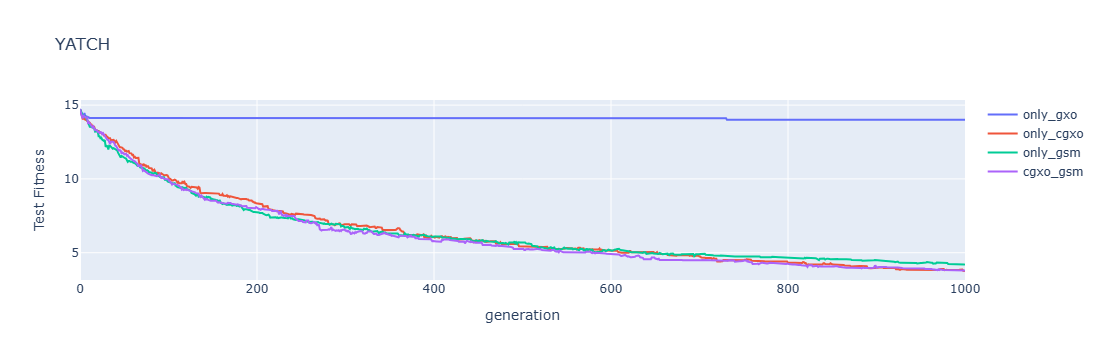

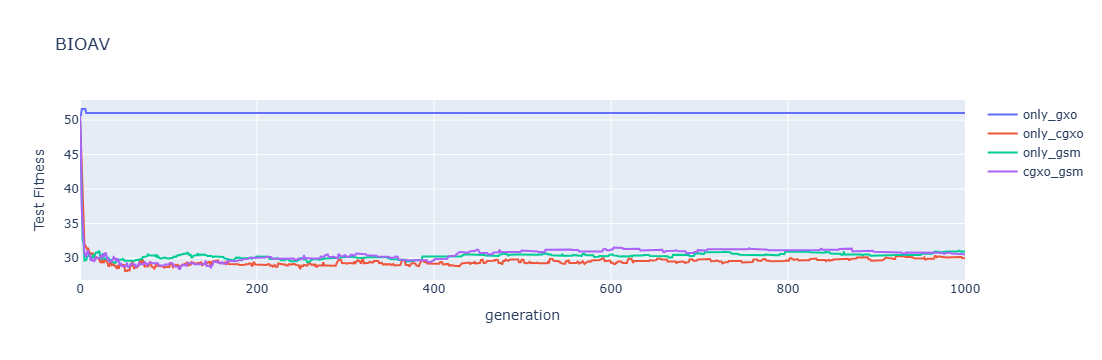

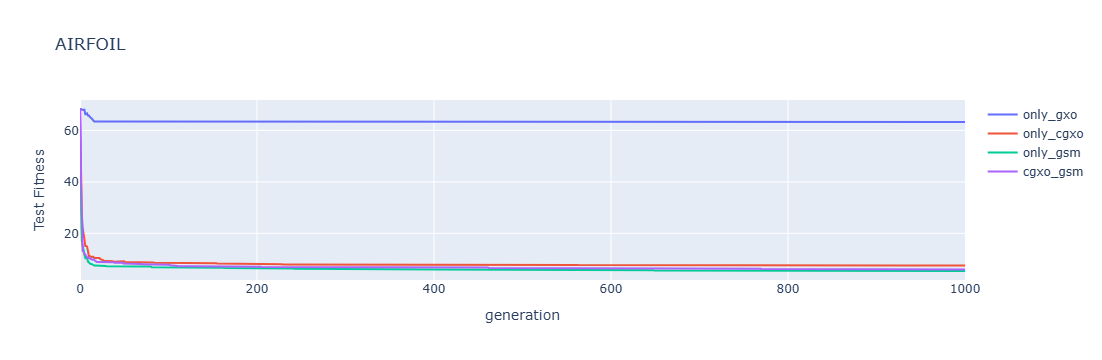

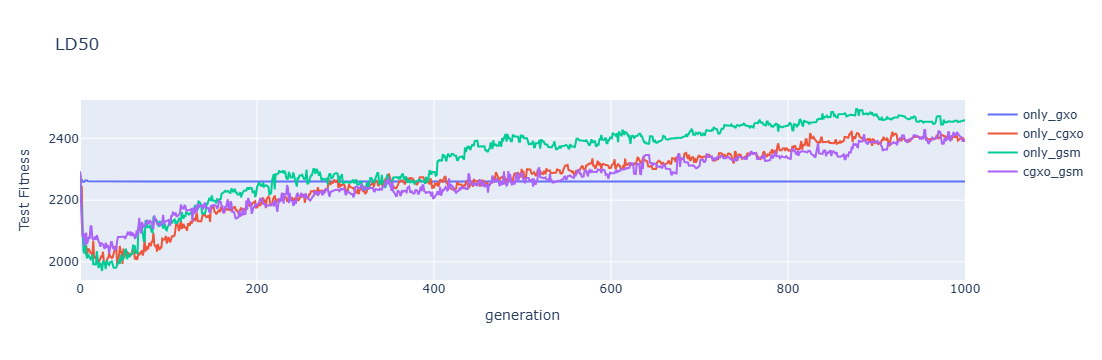

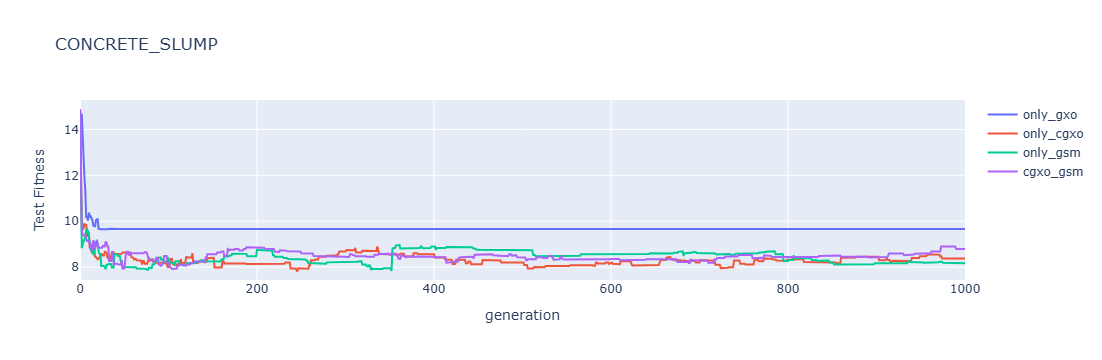

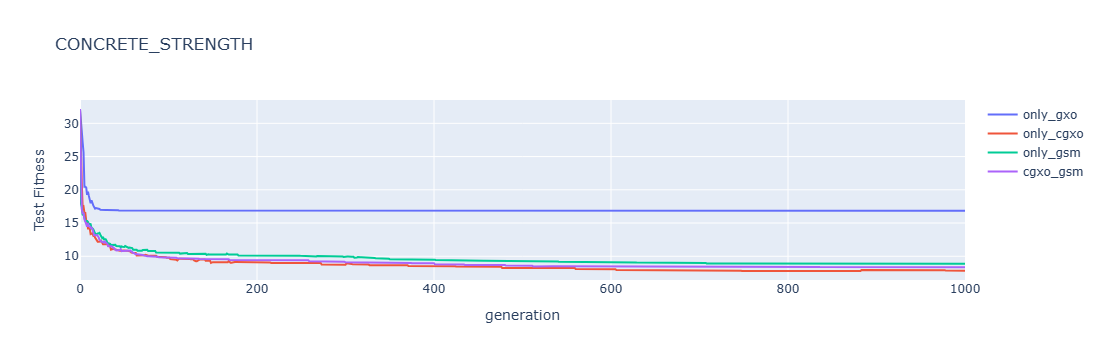

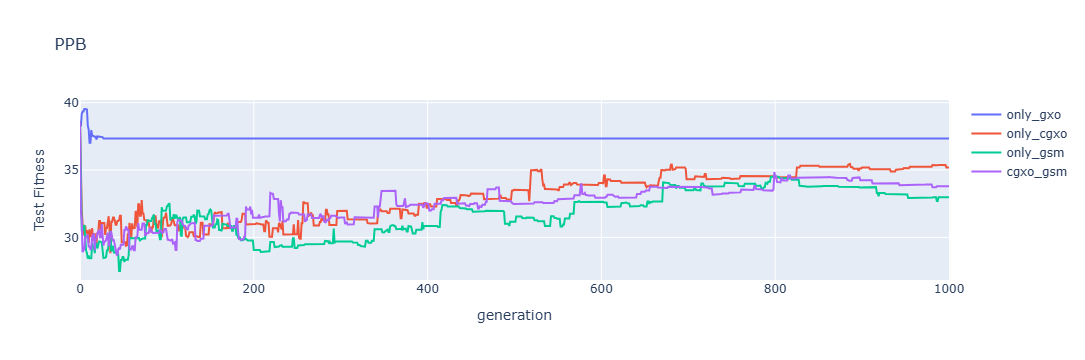

In [12]:
for input_ in dataset:
    fig = go.Figure()
    for exp in experiments:
        

        data_fitered = data.query("dataset == @input_ and experiment == @exp")[['test_fitness', 'generation']].groupby('generation').median()
        
        fig.add_trace(go.Scatter(y=data_fitered['test_fitness'], x=data_fitered.index,
                          name = exp))
        

    fig.update_layout(title_text=f'{input_.upper()}',
                     xaxis_title="generation",
                     yaxis_title="Test Fitness") 
    fig.show()

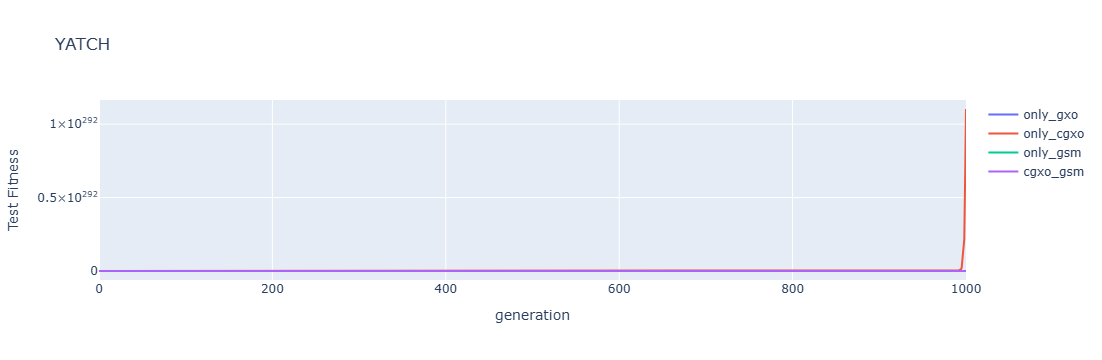

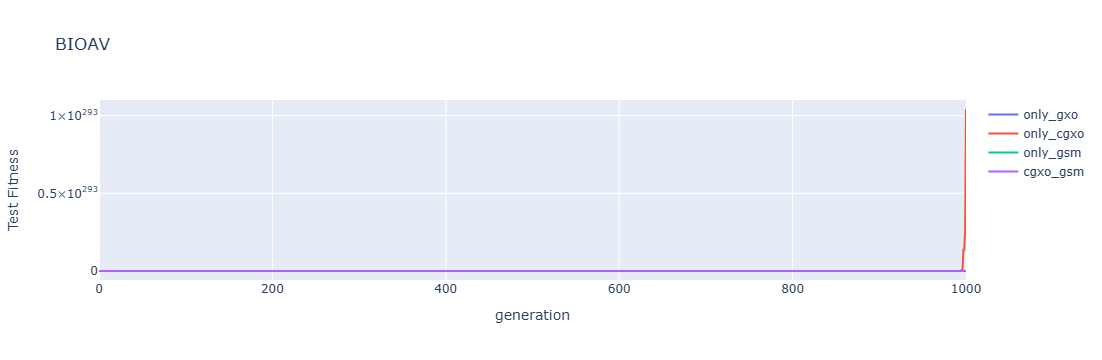

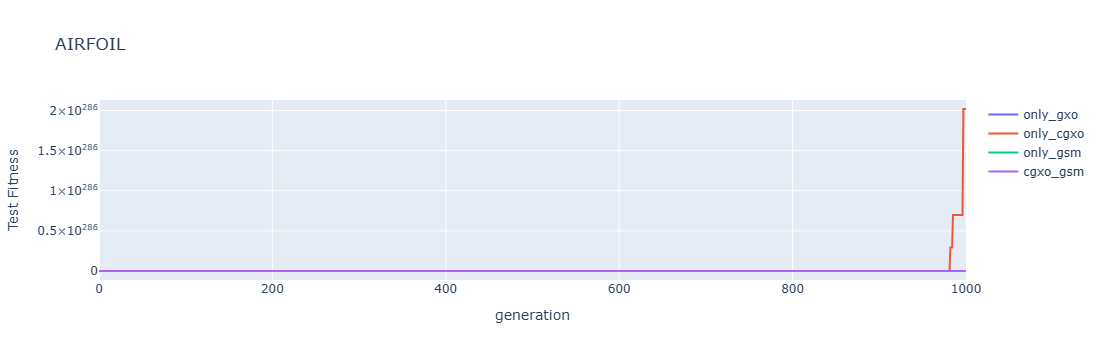

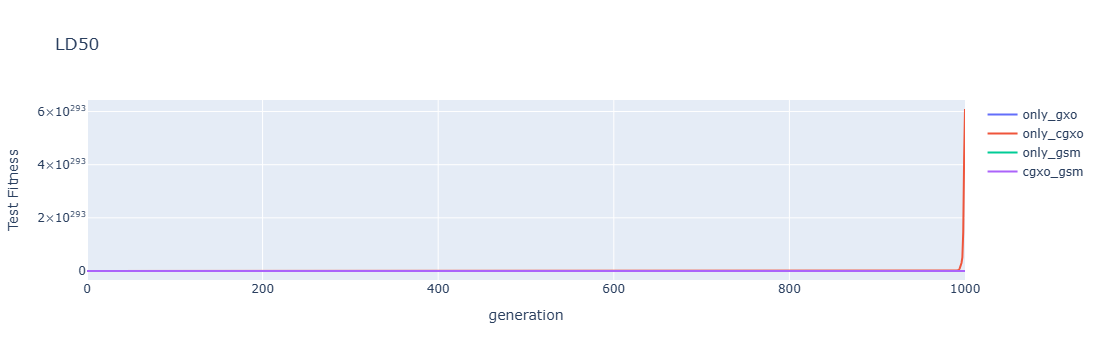

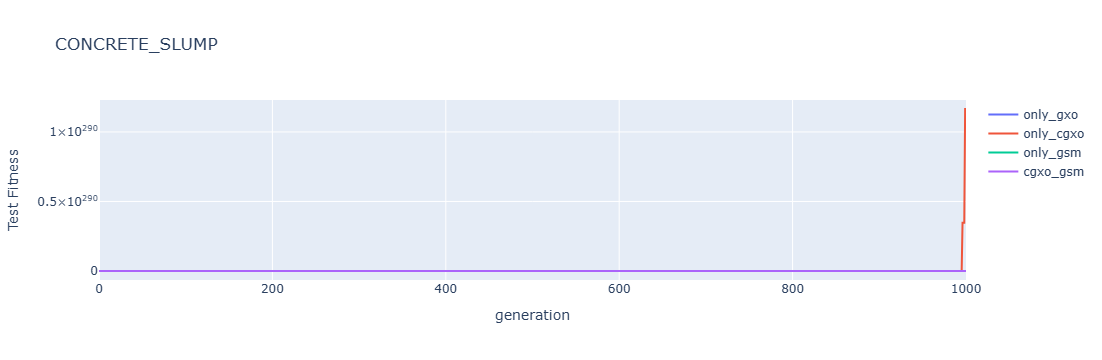

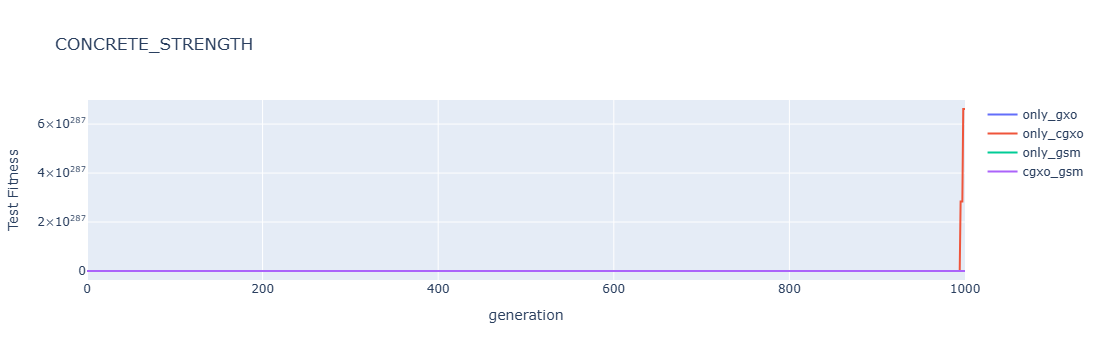

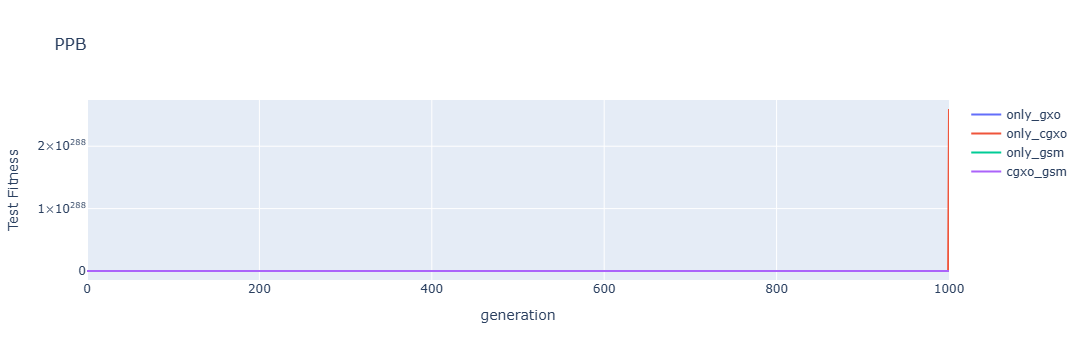

In [18]:
for input_ in dataset:
    fig = go.Figure()
    for exp in experiments:
        

        data_fitered = data.query("dataset == @input_ and experiment == @exp")[['elite_size', 'generation']].groupby('generation').median()
        
        fig.add_trace(go.Scatter(y=data_fitered['elite_size'], x=data_fitered.index,
                          name = exp))
        

    fig.update_layout(title_text=f'{input_.upper()}',
                     xaxis_title="generation",
                     yaxis_title="Test Fitness") 
    fig.show()